In [2]:
# Importação das bibliotecas
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
train_dir = "C:/Users/jorge/Desktop/DanosV4/training"
val_dir = "C:/Users/jorge/Desktop/DanosV4/validation"

In [4]:
# Definição das categorias
categories = ["Minor", "Severe"]

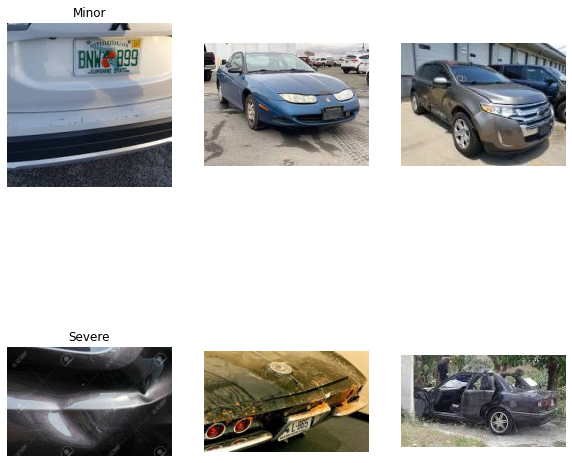

In [19]:
# Plottar 3 imagens aleatórias de cada categoria
fig, axs = plt.subplots(2, 3, figsize=(10, 10))
for i, category in enumerate(categories):
    for j in range(3):
        file = random.choice(os.listdir(os.path.join(train_dir, category)))
        img = plt.imread(os.path.join(train_dir, category, file))
        axs[i, j].imshow(img)
        axs[i, j].axis("off")
        if j == 0:
            axs[i, j].set_title(category)

plt.show()

In [20]:
# Definir arquitetura do modelo
model = keras.Sequential([
    layers.Conv2D(16, 2, activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 2, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 2, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [7]:
# Compilação do modelo
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define os geradores para treino e validação
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)



In [9]:
# Definição do batch size e tamanho de imagem
batch_size = 10
img_size = (256, 256)

# "Chamando" as imagens de treino e validação das respetivas pastas
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1383 images belonging to 2 classes.
Found 248 images belonging to 2 classes.


In [10]:
# Treinar modelo
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
139/139 [==============================] - 80s 554ms/step - loss: 0.7058 - accuracy: 0.6696 - val_loss: 0.5263 - val_accuracy: 0.6976
Epoch 2/10
139/139 [==============================] - 106s 760ms/step - loss: 0.5824 - accuracy: 0.7057 - val_loss: 0.5251 - val_accuracy: 0.7540
Epoch 3/10
139/139 [==============================] - 137s 983ms/step - loss: 0.5699 - accuracy: 0.7180 - val_loss: 0.5305 - val_accuracy: 0.6935
Epoch 4/10
139/139 [==============================] - 134s 959ms/step - loss: 0.5601 - accuracy: 0.7129 - val_loss: 0.4801 - val_accuracy: 0.8185
Epoch 5/10
139/139 [==============================] - 131s 941ms/step - loss: 0.5493 - accuracy: 0.7383 - val_loss: 0.5586 - val_accuracy: 0.7500
Epoch 6/10
139/139 [==============================] - 133s 952ms/step - loss: 0.5510 - accuracy: 0.7267 - val_loss: 0.4757 - val_accuracy: 0.7661
Epoch 7/10
139/139 [==============================] - 131s 940ms/step - loss: 0.5441 - accuracy: 0.7317 - val_loss: 0.4606 - 

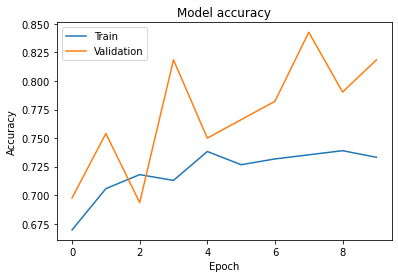

In [12]:
# Gráfico Accuracy Train vs Accuracy Validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

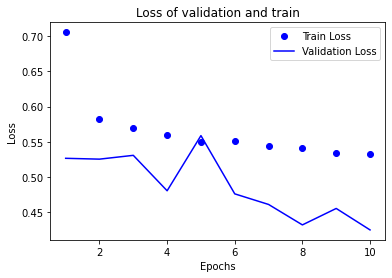

In [13]:
# Gráfico Training Loss vs Validation Loss
dic_history = history.history

loss = dic_history['loss']
val_loss = dic_history['val_loss']

epochs = range(1, len(val_loss)+1)

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss of validation and train')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()